In [33]:
import numpy as np #to import the lib
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tqdm import tqdm
import tensorflow as tf


In [34]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [35]:
files = os.listdir('dog_breed/train/')


In [36]:
labels = pd.read_csv('dog_breed/labels.csv')

In [37]:
# a = pd.read_csv('dog_breed/sample_submission.csv')
# a

In [38]:
dogs = labels.breed.tolist()

In [39]:
ids = labels.id.tolist()


In [40]:
file_path = []
for id in tqdm(ids):
    file_path.append('dog_breed/train/'+id+'.jpg')

100%|██████████| 10222/10222 [00:00<00:00, 863876.19it/s]


In [41]:
breeds=labels.breed.value_counts().keys()


In [42]:
y = []
def choose(br):
    for i, dog in enumerate(breeds):
        if br==dog:
            return i

In [43]:
for item in dogs:
    y.append(choose(item))

In [44]:
len(y) , len(breeds) , len(dogs)

(10222, 120, 10222)

In [45]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [46]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)


In [47]:
#no need to load this, because we are getting a features.npy file saved in our folder
features = []
for i, im_path in enumerate(file_path):
    img = cv2.imread(im_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299,299)) 
    img = img/255.0
    img = img.reshape(1,299, 299, 3)
    out = model.predict(img)
    features.append(out)
    if i%100==0:
        print(i)
        
features = np.squeeze(features)

np.save('dog_breed/db_features.npy', features)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200


In [48]:
trainfeatures = np.load('dog_breed/db_features.npy')

In [49]:
from keras.models import Model

In [50]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(2048,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='softmax'))

# model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [51]:

from sklearn.model_selection import train_test_split

# Load dataset.

X, y = trainfeatures , y

# split data into training and test data.
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)
print("Labels for training and testing data")
len(train_y),len(test_y) , train_X.shape

Labels for training and testing data


(8177, 2045, (8177, 2048))

In [52]:
history = model.fit(train_X, np.array(train_y),validation_data=(test_X, np.array(test_y)),
                    batch_size=128,
                    epochs=10,
                    verbose=1 )
model.save('model1.h5')

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 1.8108 - accuracy: 0.6093 - val_loss: 0.5307 - val_accuracy: 0.8293
Epoch 2/10
8177/8177 [==============================] - 2s 223us/sample - loss: 0.4750 - accuracy: 0.8530 - val_loss: 0.4392 - val_accuracy: 0.8601
Epoch 3/10
8177/8177 [==============================] - 2s 220us/sample - loss: 0.3646 - accuracy: 0.8865 - val_loss: 0.4315 - val_accuracy: 0.8616
Epoch 4/10
8177/8177 [==============================] - 2s 207us/sample - loss: 0.3098 - accuracy: 0.9006 - val_loss: 0.4991 - val_accuracy: 0.8479
Epoch 5/10
8177/8177 [==============================] - 2s 227us/sample - loss: 0.2637 - accuracy: 0.9141 - val_loss: 0.4612 - val_accuracy: 0.8641
Epoch 6/10
8177/8177 [==============================] - 2s 260us/sample - loss: 0.2338 - accuracy: 0.9211 - val_loss: 0.4654 - val_accuracy: 0.8636
Epoch 7/10
8177/8177 [==============================] - 2s 223us/s

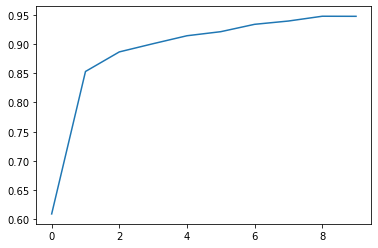

In [53]:
plt.plot(history.history['accuracy'])
plt.show()

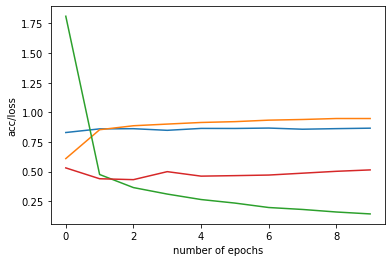

In [54]:
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.xlabel('number of epochs')
plt.ylabel('acc/loss')
plt.show()
